In [ ]:
#@title Installation and Setup

!pip install --quiet geopandas geopy meteostat

import requests
from google.colab import userdata
import geopandas as gpd
from datetime import datetime
import pandas as pd
import numpy as np
from meteostat import Point, Daily
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For interactive maps
from folium import PolyLine # PolyLine is directly importable from folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from IPython.display import Image

# 👋🏼 Introduction (if you're just joining us!)
_As a developer relations engineer, my work usually involves staring at screens filled with code. But this winter break, I [embarked on a journey](https://www.github.com/dynamicwebpaige/operation-code-freeze) that took me far from my usual desk setup – all the way to the icy landscapes of Antarctica and South America. This wasn't just a vacation; it was a chance to witness the raw beauty of our planet, learn about the history of Antarctic exploration, and even do a little coding amidst the icebergs and penguins._

This second installment details adventures with penguins and sea lions in Puerto Madryn, Argentina, and the Falkland Islands.

In [ ]:
#@title Timeline
import calendar
import datetime

def create_december_2024_calendar():
    """Creates a formatted calendar for December 2024 with specific dates filled in."""

    # --- Styling ---
    header_color = "\033[1;38;5;117m"   # Bold Light Purple
    weekday_color = "\033[38;5;253m"    # Very Light Gray (almost white)
    weekend_color = "\033[38;5;244m"    # Medium Light Gray
    filled_date_color = "\033[1;38;5;120;48;5;236m"  # Bold Green on Dark Gray background
    other_month_color = "\033[38;5;238m" # Darker Gray for days not in December
    reset_color = "\033[0m"          # Reset color

    # --- Filled Dates ---
    filled_dates = [20, 21, 22, 23]

    # --- Calendar Creation ---
    cal = calendar.Calendar(firstweekday=6)  # Start week on Sunday
    dec_2024 = cal.monthdatescalendar(2024, 12)

    # --- Header ---
    print(f"{header_color}       .: DECEMBER 2024 :.{reset_color}")
    print(f"{weekday_color}  Su  Mo  Tu  We  Th  Fr  Sa {reset_color}")  # Added extra spaces

    # --- Calendar Body ---
    for week in dec_2024:
        week_str = ""
        for date in week:
            day = date.day
            if date.month != 12:
                # Dates outside of December in darker gray
                week_str += f"{other_month_color} {day:2} {reset_color}"
            elif day in filled_dates:
                # Filled dates in green on dark gray background
                week_str += f"{filled_date_color} {day:2} {reset_color}"
            elif date.weekday() == 5 or date.weekday() == 6:
                # Weekends in medium light gray
                week_str += f"{weekend_color} {day:2} {reset_color}"
            else:
                # Weekdays in very light gray
                week_str += f"{weekday_color} {day:2} {reset_color}"
        print(week_str)

# --- Run and Display the Calendar ---
create_december_2024_calendar()

       .: DECEMBER 2024 :.
  Su  Mo  Tu  We  Th  Fr  Sa 
  1   2   3   4   5   6   7 
  8   9  10  11  12  13  14 
 15  16  17  18  19  20  21 
 22  23  24  25  26  27  28 
 29  30  31   1   2   3   4 


# 1️⃣ Brief stop in Puerto Madryn

Our adventure began with a short but sweet visit to Puerto Madryn, a coastal city in Argentina known as the gateway to the Valdés Peninsula. While our time was limited, I managed to create a map highlighting some of the key attractions in the area:

In [ ]:
#@title Puerto Madryn - map of the city
import folium
import webbrowser
from IPython.display import display, HTML

# Get lat/long coordinates for a given city.
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Define the coordinates for Puerto Madryn
madryn_coords = (-42.7685, -65.0388)

# Create the map
madryn_map = folium.Map(location=madryn_coords, zoom_start=12)

# Tourist site data
tourist_sites = [
    {
        'name': 'Playa El Doradillo',
        'coords': (-42.7113, -64.9747),
        'description': 'Famous for shore-based whale watching (June to October). You can spot Southern Right Whales from the beach.',
        'link': 'https://www.viator.com/Puerto-Madryn-attractions/Playa-El-Doradillo/d4813-a15986',
        'icon': 'whale',
    },
    {
        'name': 'Península Valdés',
        'coords': (-42.5000, -64.0000),
        'description': 'A UNESCO World Heritage site, known for its diverse marine wildlife including whales, sea lions, elephant seals, and penguins.',
        'link': 'https://whc.unesco.org/en/list/937/',
        'icon': 'info-sign',
    },
     {
        'name': 'Punta Tombo',
        'coords': (-44.0167, -65.2000),
        'description': 'Home to a large colony of Magellanic penguins during the breeding season.',
        'link': 'https://www.viator.com/Puerto-Madryn-tours/Wildlife-Tours/d4813-g16855',
        'icon': 'baby-penguin',
    },
    {
        'name': 'Puerto Madryn Beach',
        'coords': (-42.7737, -65.0375),
        'description': 'A long, curving beach in the city center, great for walks, sunrises, and spotting wildlife.',
        'link': 'https://www.expedia.com/Puerto-Madryn-Puerto-Madryn-Beach.dx6148381',
         'icon':'sun',
    },
    {
       'name': 'Ecocentro',
       'coords': (-42.7729, -65.0216),
       'description': 'An institution dedicated to marine life and education.',
       'link': 'https://www.lonelyplanet.com/argentina/patagonia/puerto-madryn/attractions/ecocentro/a/poi-1446574',
       'icon': 'book',
    },
    {
        'name': 'Reserva Faunística Punta Loma',
        'coords': (-42.8665, -64.9715),
        'description':'A sea lion reserve with a permanent colony, also home to a cormorant rookery.',
        'link': 'https://www.lonelyplanet.com/argentina/patagonia/puerto-madryn/attractions/reserva-faunistica-punta-loma/a/poi-1446573',
        'icon':'paw',
    },
      {
        'name': 'Playa Paraná',
        'coords': (-42.8149, -65.0286),
        'description': 'An extensive pebble beach, good for fishing.',
          'link': 'https://www.argentinapura.com/en/puerto-madryn-travel-guide',
        'icon':'map-marker',
    },
        {
        'name': 'Museo Oceanográfico y de Ciencias Naturales',
        'coords': (-42.7736, -65.0363),
        'description': 'A museum with hands-on exhibits of local marine life.',
        'link': 'https://www.lonelyplanet.com/argentina/patagonia/puerto-madryn/attractions/museo-oceanografico-y-de-ciencias-naturales/a/poi-1446572',
         'icon':'compass',
    },
    {
      'name': 'Diving with Sea Lions',
      'coords': (-42.7789, -65.0036),
       'description': 'Take a tour and dive or snorkel with the sea lions in their natural environment.',
        'link': 'https://www.peninsulavaldes.com/diving-with-sea-lions-in-puerto-madryn/',
        'icon':'water',
    },
     {
        'name': 'Plaza San Martín',
        'coords': (-42.7677, -65.0397),
        'description': 'A historic square with a statue of Luis Piedrabuena, perfect for a walk and enjoying sea views.',
        'link': 'https://www.hotelpeninsula.com.ar/en/tourist-attractions/',
        'icon': 'tree',
    },
    {
        'name': 'Sagrado Corazón de Jesús Church',
        'coords': (-42.7665, -65.0393),
         'description':'An architectural gem with a charming facade and serene interior.',
        'link': 'https://www.hotelpeninsula.com.ar/en/tourist-attractions/',
        'icon': 'church',
    },
     {
        'name': 'Museo del Desembarco',
        'coords': (-42.7646, -65.0373),
        'description': 'Museum showcasing the history of the early Welsh settlers and their legacy in the region.',
        'link': 'https://www.hotelpeninsula.com.ar/en/tourist-attractions/',
        'icon': 'museum',
    }
]

# Add markers to the map
for site in tourist_sites:
    html = f"""
        <b>{site['name']}</b><br>
        {site['description']}<br>
        <a href="{site['link']}" target="_blank">Learn More</a>
    """
    iframe = folium.IFrame(html, width=300, height=150)
    popup = folium.Popup(iframe, max_width=2650)
    icon = folium.Icon(color="blue", icon=site['icon'], prefix='fa')
    folium.Marker(location=site['coords'], popup=popup, icon=icon).add_to(madryn_map)



#Display the map in Colab
madryn_map

As you can see, there's no shortage of natural wonders to explore, particularly if you're interested in marine life.

Here's a quick look at our route for this portion of the trip, as well as a sample of the weather. The wind gusts were so severe during the morning of our visit that the ship was unable to dock - so me and my cruisemates weren't able to visit Punta Tombo.

In [ ]:
#@title Cruise Path
import folium

# Coordinates of the ports
ports = {
    "Buenos Aires": (-34.6037, -58.3816),
    "Montevideo": (-34.9011, -56.1645),
    "Punta del Este": (-34.9667, -54.9500),
    "Puerto Madryn": (-42.7692, -65.0385),
}

# Create a Folium map
map_center = [-38, -58]
cruise_map = folium.Map(location=map_center, zoom_start=5)

# Add a title using a DivIcon
title_html = '''
             <div style="position: fixed;
                         top: 10px; center: 50px; width: 220px; height: 60px;
                         z-index:9999; font-size:16px; font-weight:bold;
                         background-color: #ffffff; border:2px solid grey;
                         ">Argentina and Uruguay: December 16th - 20th</div>
             '''
cruise_map.get_root().html.add_child(folium.Element(title_html))

# Create a list of coordinates for the cruise path
cruise_path = [ports[city] for city in ["Buenos Aires", "Montevideo", "Punta del Este", "Puerto Madryn"]]

# Add markers
for city, coord in ports.items():
    folium.Marker(
        location=coord,
        popup=city,
        icon=folium.Icon(color="blue", icon="ship", prefix="fa"),
    ).add_to(cruise_map)

# Add the cruise path
folium.PolyLine(
    locations=cruise_path,
    color="red",
    weight=2.5,
    opacity=1,
).add_to(cruise_map)

# Save the map
cruise_map

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">my penguins got canceled for today (winds @ 40 knots, way too high to dock) 🥺🐧<br><br>but the retirees are more upset about it than I am, such a long line at guest services! – and the cafe is packed, one older gentleman just got up and said &quot;TWO CHAIRS UP FOR AUCTION, FOLKS&quot; 😂 <a href="https://t.co/quHislzC3f">pic.twitter.com/quHislzC3f</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1870101260113981757?ref_src=twsrc%5Etfw">December 20, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🚢 Captain&#39;s log, Stardate 21.12.2024:<br><br>Today the captain has discovered she does not succumb to sea sickness, but that sometimes trees and television sets do. Bouncy day at sea today en route to the Falkland Islands and Port Stanley! Penguins imminent! 🐧❤️ <a href="https://t.co/vl8HKUI100">pic.twitter.com/vl8HKUI100</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1870509912016502856?ref_src=twsrc%5Etfw">December 21, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

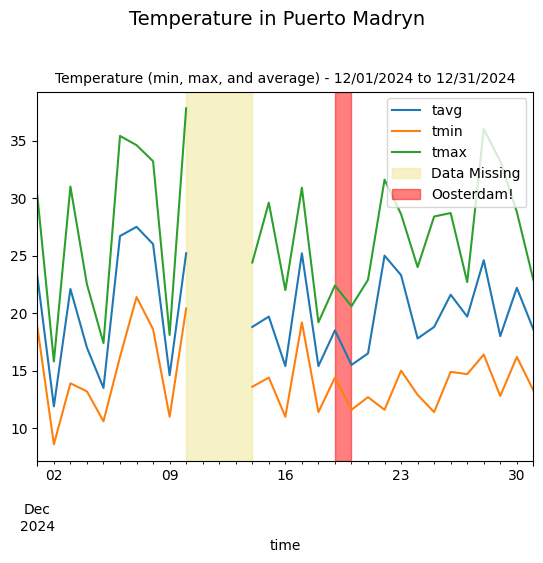

In [ ]:
#@title Weather in Puerto Madryn
# Set time period to be the month of travel.
start = datetime(2024, 12, 1)
end = datetime(2024, 12, 31)

# Create Point for Puerto Madryn.
puerto_madryn = get_coordinates("Puerto Madryn")
location = Point(puerto_madryn[0], puerto_madryn[1], 70)

data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax']) # Other useful ones are tmin, tmax, tavg, wpgt for gusts

# Add a title for "Weather conditions in Punta del Este, Uruguay".
plt.suptitle("Temperature in Puerto Madryn", y=1.05, fontsize=14)
plt.title('Temperature (min, max, and average) - 12/01/2024 to 12/31/2024', fontsize=10)
plt.axvspan(datetime(2024, 12, 10), datetime(2024, 12, 14), color='khaki', alpha=0.5, label='Data Missing')
plt.axvspan(datetime(2024, 12, 19), datetime(2024, 12, 20), color='red', alpha=0.5, label='Oosterdam!')
plt.legend()
plt.show()

# 2️⃣ Falkland Islands - finally, penguins!

The Falkland Islands have been the highlight (this far!) of the trip. These remote islands are teeming with wildlife, especially penguins! The Oosterdam's passengers disembarked at Stanley, the capital, and were immediately struck by the unique character of this town.

Here's a little map of Stanley with a few points of interest:

In [ ]:
#@title Falkland Islands - some of the places
cruise_path_data = [
    {'latitude': -51.7, 'longitude': -59.5, 'location': 'Near East Falkland'},
    {'latitude': -51.7963, 'longitude': -57.852, 'location': 'Stanley, Falkland Islands'},
    {'latitude': -52.2, 'longitude': -60.0, 'location': 'West Falkland'},
]
cruise_path_df = pd.DataFrame(cruise_path_data)

# Create a Folium map centered on the Falklands
falklands_map = folium.Map(location=[-51.7963, -57.852], zoom_start=8)

# Add markers for waypoints
for index, row in cruise_path_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['location'],
    ).add_to(falklands_map)

# Add a line to represent the approximate path
folium.PolyLine(
    locations=cruise_path_df[['latitude', 'longitude']].values.tolist(),
    color='blue',
    weight=2.5,
    opacity=1
).add_to(falklands_map)

# Display the map
falklands_map

In [ ]:
# Sample locations (replace with your actual visited places)
stanley_locations = {
    'Christ Church Cathedral': [-51.6963, -57.8524],
    'Falkland Islands Museum': [-51.6970, -57.8570],
    '1982 Memorial': [-51.6954, -57.8521],
    'Penguin Walk': [-51.6998, -57.8719] # Example, check actual location for penguin walks
}

# Create a Folium map centered on Stanley
stanley_map = folium.Map(location=[-51.6963, -57.852], zoom_start=14)

# Create a marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(stanley_map)

# Add markers for each location
for location, coordinates in stanley_locations.items():
    folium.Marker(
        location=coordinates,
        popup=location,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
stanley_map

But the real stars of the show were the penguins! We saw both Gentoo and King penguins. It was incredible to observe these birds in their natural habitat.

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">THERE ARE PENGUINS EVERYWHERE <br><br>Gentoos, and King penguins – but unfortunately, the Falkland Islands has bird flu this year, for the very first time. Volunteers Point has been having ~2 penguin fatalities per day, we couldn&#39;t get as close as normal. 🥺 <a href="https://t.co/WCQrrgKCr2">pic.twitter.com/WCQrrgKCr2</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1870860283310452976?ref_src=twsrc%5Etfw">December 22, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


To give you a sense of where these amazing creatures live, I put together an interactive map of all the various penguin species and their general locations:



In [ ]:
#@title Penguin locations in the world
import folium
import pandas as pd

# Geographic data for each penguin type
penguin_data = {
    'Penguin': [
        'Emperor Penguin', 'King Penguin', 'Adélie Penguin', 'Chinstrap Penguin',
        'Gentoo Penguin', 'Galápagos Penguin', 'Humboldt Penguin',
        'Magellanic Penguin', 'African Penguin', 'Little Blue Penguin',
        'Yellow-eyed Penguin', 'Fiordland Penguin', 'Snares Penguin',
        'Erect-crested Penguin', 'Northern Rockhopper Penguin', 'Southern Rockhopper Penguin',
         'Macaroni Penguin', 'Royal Penguin'
    ],
    'Latitude': [
        -75, -54, -70, -63, -62, -0.5, -20, -45, -30, -40,
         -45, -45.5, -48, -49.5, -50, -51,
         -55, -55
    ],
    'Longitude': [
        10, -60, 145, -60, -65, -91, -73, -65, 20, 150,
         170, 167, 166, -178, 0, 0,
         -50, 159
    ],
    'Location': [
        "Antarctica", "Sub-Antarctic islands", "Antarctica",
        "Antarctic Peninsula and nearby islands",
        "Antarctic Peninsula and sub-Antarctic islands", "Galápagos Islands",
        "Coastal Peru and Chile", "South American coasts",
        "Southern African coast", "Coasts of southern Australia and New Zealand",
        "New Zealand", "New Zealand", "Snares Islands (south of New Zealand)",
        "Bounty and Antipodes Islands (New Zealand)",
        "Sub-Antarctic islands in the Indian and Atlantic Oceans",
        "Sub-Antarctic islands in the Indian and Atlantic Oceans", "Sub-Antarctic islands",
        "Macquarie Island"
    ],
    'Color': [
        'red', 'orange', 'lightred', 'pink',
        'purple', 'darkpurple', 'beige', 'green',
        'darkgreen', 'blue', 'lightblue', 'darkblue',
        'cadetblue', 'darkcadetblue', 'lightgray', 'gray',
        'black', 'white'
    ]
}


df = pd.DataFrame(penguin_data)

# Create a map centered on the Southern Hemisphere
m = folium.Map(location=[-40, 0], zoom_start=3)

# Add a marker for each penguin species
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=row['Color'],
        fill=True,
        fill_color=row['Color'],
        fill_opacity=0.7,
        popup=f"<b>{row['Penguin']}</b><br>Location: {row['Location']}"
    ).add_to(m)


# Create a legend for the map
legend_html = """
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 250px; height: 350px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: 0.75; padding: 10px;
                ">
       <b>Penguin Map Legend</b> <br>
    """
for index, row in df.iterrows():
        legend_html += f'<i style="background:{row["Color"]};border-radius:50%;width:10px;height:10px;display:inline-block;"></i>  <span style="display:inline-block;"> {row["Penguin"]}</span><br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))


# Display the map
m

# 3️⃣ Life at Sea
The journey itself was a unique experience. We learned a lot about the inner workings of the ship. For example, did you know that crew members need to be multi-talented?

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🚢 Also loved the discussion about how the ship crew needs to learn multiple skill sets – evacuation procedures, how to put out fires, flip lifeboats, etc.<br><br>&quot;We&#39;re a military vessel first, and a hotel second. That also means that it&#39;s hard to remodel ships, after they&#39;re built.&quot; <a href="https://t.co/zw1SGEjcyt">pic.twitter.com/zw1SGEjcyt</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1871172252013891761?ref_src=twsrc%5Etfw">December 23, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

And was keeping busy with work things, though technically on vacation. We've been busy! Products that have shipped during this segment:
- Kaggle Long Context Competition Winners
- Thinking Mode
- Veo 2
- Gemini 2.0 Multimodal Live API
- "Deep Research" mode in the Gemini app

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Considering its speed, we&#39;re pretty happy with how the experimental Gemini 2.0 Flash Thinking model is performing on lmsys. <a href="https://t.co/PcffqmVuOw">https://t.co/PcffqmVuOw</a></p>&mdash; Jeff Dean (@JeffDean) <a href="https://twitter.com/JeffDean/status/1869795828493320541?ref_src=twsrc%5Etfw">December 19, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">📏🏆 Overjoyed to announce the winners of the Gemini Long Context Competition on <a href="https://twitter.com/kaggle?ref_src=twsrc%5Etfw">@Kaggle</a>!<br><br>We were blown away by the creativity, ingenuity, and technical skill demonstrated in folks&#39; submissions.<br><br>It&#39;s clear that the Kaggle community is pushing the boundaries of what&#39;s possible… <a href="https://t.co/nbExopuy1t">pic.twitter.com/nbExopuy1t</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1869787441797697645?ref_src=twsrc%5Etfw">December 19, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


It's been a lot of fun to experiment with the new publicly-available tools, and to use them to create things like games and music videos.

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🪨❤️ Gemini 2.0 with Thinking can balance a geologic cross-section –<br><br>– meaning it can analyze a faulted, eroded, contorted cross-section of rock layers, and roll back time to when they were first put in place.<br><br>🤯 Early days, but holy moly this is cool. <a href="https://t.co/RVCKdj6RSN">pic.twitter.com/RVCKdj6RSN</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1869942234029723824?ref_src=twsrc%5Etfw">December 20, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🥹🎶 Favorite Veo 2 thing:<br><br>I&#39;ve always wanted to create fan videos for under-appreciated tracks by local artists—and now that&#39;s finally possible. It&#39;s not perfect, but it&#39;s getting there. ♥️<br><br>👇 My beloved Mathletes, you should check out their <a href="https://twitter.com/Bandcamp?ref_src=twsrc%5Etfw">@bandcamp</a>: <a href="https://t.co/ISyktwVdRZ">https://t.co/ISyktwVdRZ</a> <a href="https://t.co/K7zka2fHrH">pic.twitter.com/K7zka2fHrH</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1869381263179632750?ref_src=twsrc%5Etfw">December 18, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Seeing all of the Gemini 2.0 and Veo 2 projects that y&#39;all have been building and sharing on Twitter over the past few days... it&#39;s a little like Christmas has come early. 🥹🎁<br><br>Love the creativity, the speed, and the stellar use cases – and we&#39;re only at the beginning. 🚀 <a href="https://t.co/vC9PvuzdAE">https://t.co/vC9PvuzdAE</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1870269210577797321?ref_src=twsrc%5Etfw">December 21, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# Next Stop: Antarctica!

Next stop is the main event - Antarctica. Cannot wait to see icebergs, even more wildlife and penguins, and to retrace Shackleton's journey. Stay tuned!

In [ ]:
%%html
<iframe width="100%" height="1000" src="//jsfiddle.net/dynamicwebpaige1/6vk3798h/8/embedded/result/dark/" frameborder="0" loading="lazy" allowtransparency="true" allowfullscreen="true"></iframe>

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Penguins learning about Gemini in Antarctica. <a href="https://twitter.com/hashtag/Veo2?src=hash&amp;ref_src=twsrc%5Etfw">#Veo2</a> <a href="https://t.co/ftdJ1Qx4a8">pic.twitter.com/ftdJ1Qx4a8</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1869128375924863318?ref_src=twsrc%5Etfw">December 17, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>